In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import exponential as rnd

In [2]:
n_simulacoes = 10000

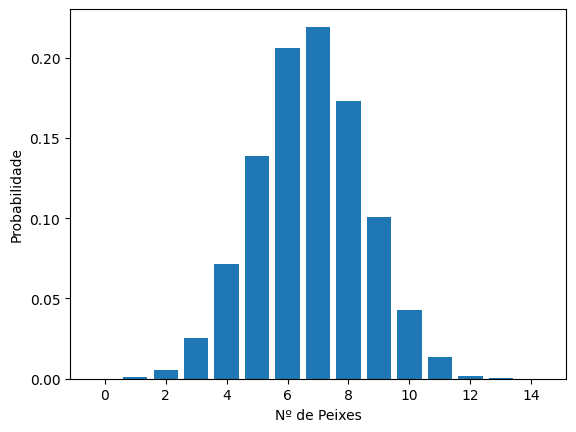

In [3]:
def simular_pesca() -> int:
    peixes = 0
    tempo_pesca = 10
    taxa_chegada = 1
    tempo_limpeza = 0.5
    tempo_restante = tempo_pesca
    while tempo_restante > 0:
        tempo_restante -= rnd(1 / taxa_chegada)
        if tempo_restante > 0:
            peixes += 1
            tempo_restante -= tempo_limpeza
    return peixes


resultados = [simular_pesca() for _ in range(n_simulacoes)]

valores, contagens = np.unique(resultados, return_counts=True)
probabilidades = contagens / n_simulacoes

# Plotar gráfico
plt.bar(valores, probabilidades)
plt.xlabel("Nº de Peixes")
plt.ylabel("Probabilidade")
plt.show()

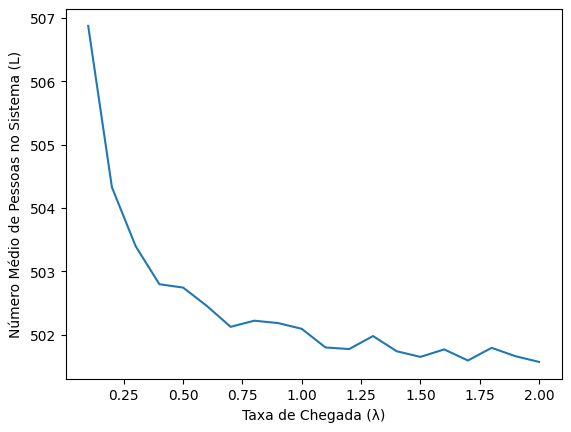

In [4]:
mi_1 = 1
mi_2 = 1
max_tempo = 1000
taxas_chegada = np.linspace(0.1, 2, 20)  # taxas de chegada a serem testadas


def a(taxa_chegada):
    tempo = 0
    pessoas_no_sistema = []
    while tempo < max_tempo:
        tempo_chegada = rnd(1 / taxa_chegada)
        tempo_servico_massagem = rnd(1 / mi_1)
        tempo_servico_acupuntura = rnd(1 / mi_2)
        tempo += tempo_chegada + tempo_servico_massagem + tempo_servico_acupuntura
        pessoas_no_sistema.append(tempo)
    return pessoas_no_sistema


# Executar simulações
medias = []
for taxa_chegada_mm1 in taxas_chegada:
    pessoas_no_sistema = []
    for _ in range(n_simulacoes):
        pessoas_no_sistema.extend(a(taxa_chegada_mm1))
    medias.append(np.mean(pessoas_no_sistema))

# Plotar gráfico
plt.plot(taxas_chegada, medias)
plt.xlabel("Taxa de Chegada (λ)")
plt.ylabel("Número Médio de Pessoas no Sistema (L)")
plt.show()

/home/heitor/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/heitor/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


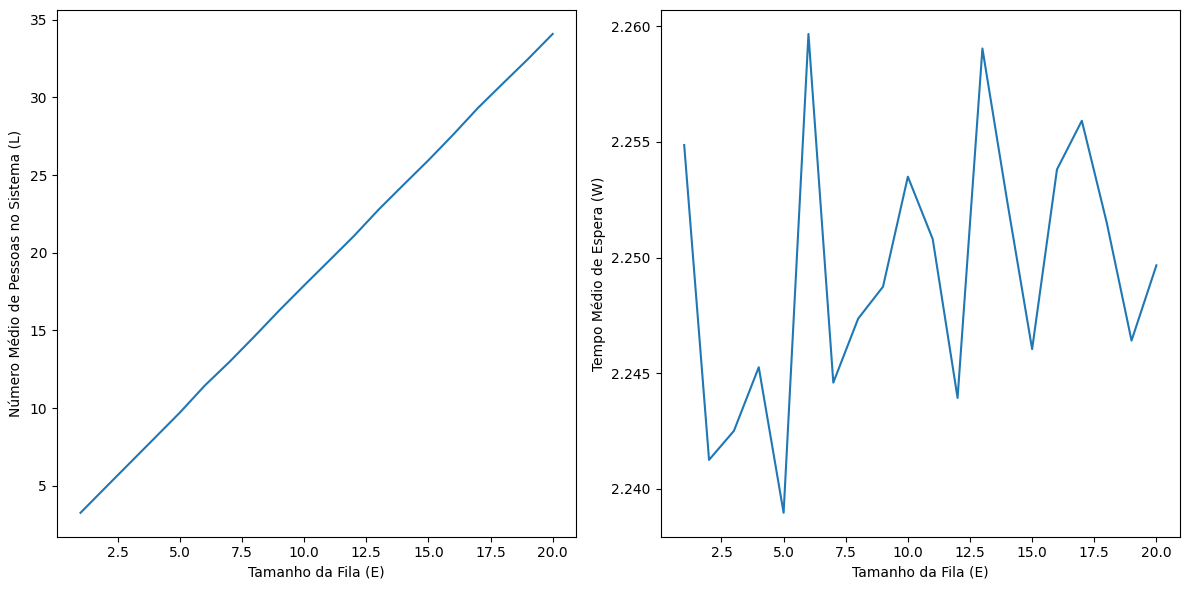

In [5]:
tamanhos_fila = range(0, 21)
taxa_servico = 1
taxa_chegada_mm1 = 0.8


def b(tamanho_fila):
    tempo = 0
    fila = 0
    pessoas_no_sistema = []
    tempos_espera = []
    while tempo < max_tempo:
        tempo_chegada = rnd(1 / taxa_chegada_mm1)
        tempo_servico_massagem = rnd(1 / mi_1)
        tempo_servico_acupuntura = rnd(1 / mi_2)
        if fila < tamanho_fila:
            fila += 1
            tempo += tempo_chegada + tempo_servico_massagem + tempo_servico_acupuntura
            pessoas_no_sistema.append(tempo)
            tempos_espera.append(tempo_chegada + tempo_servico_massagem)
        else:
            tempo += tempo_chegada
    return pessoas_no_sistema, tempos_espera


medias_pessoas = []
medias_espera = []
for tamanho_fila in tamanhos_fila:
    pessoas_no_sistema = []
    tempos_espera = []
    for _ in range(n_simulacoes):
        pessoas, espera = b(tamanho_fila)
        pessoas_no_sistema.extend(pessoas)
        tempos_espera.extend(espera)
    medias_pessoas.append(np.mean(pessoas_no_sistema))
    medias_espera.append(np.mean(tempos_espera))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(tamanhos_fila, medias_pessoas)
plt.xlabel("Tamanho da Fila (E)")
plt.ylabel("Número Médio de Pessoas no Sistema (L)")

plt.subplot(1, 2, 2)
plt.plot(tamanhos_fila, medias_espera)
plt.xlabel("Tamanho da Fila (E)")
plt.ylabel("Tempo Médio de Espera (W)")

plt.tight_layout()
plt.show()

In [6]:
taxa_servico = 1.2
taxa_chegada_mm1 = 1
n_simulacoes = 1000
max_tempo = 1000
probabilidades = np.linspace(0, 1, 11)


def simular(probabilidade):
    tempo = 0
    fila = []
    tempos_espera = []
    while tempo < max_tempo:
        tempo_chegada = rnd(1 / taxa_chegada_mm1)
        tempo_servico = rnd(1 / taxa_servico)
        preferencial = np.random.rand() < probabilidade
        if preferencial:
            fila.insert(0, (tempo_chegada, tempo_servico))
        else:
            fila.append((tempo_chegada, tempo_servico))
        while fila and tempo + fila[0][1] < max_tempo:
            chegada, servico = fila.pop(0)
            tempo += chegada
            tempos_espera.append(tempo)
            tempo += servico
    return tempos_espera


medias = []
dados_boxplot = []
for probabilidade in probabilidades:
    tempos_espera = []
    for _ in range(n_simulacoes):
        tempos_espera.extend(simular(probabilidade))
    medias.append(np.mean(tempos_espera))
    dados_boxplot.append(tempos_espera)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(probabilidades, medias)
plt.xlabel("Probabilidade de ser Preferencial (P)")
plt.ylabel("Tempo Médio de Espera (W)")

plt.subplot(1, 2, 2)
plt.boxplot(dados_boxplot, labels=probabilidades)
plt.xlabel("Probabilidade de ser Preferencial (P)")
plt.ylabel("Tempo de Espera")

plt.tight_layout()
plt.show()

: 

In [3]:
taxa_servico = 1.2
taxa_chegada_mm1 = 1
taxa_chegada_mm2 = 2
n_simulacoes = 1000
max_tempo = 1000


def simular(taxa_chegada, n_atendentes):
    tempo = 0
    fila = []
    tempos_espera = []
    tempos_ocioso = [0] * n_atendentes
    ultimo_tempo = [0] * n_atendentes
    while tempo < max_tempo:
        tempo_chegada = np.random.exponential(1 / taxa_chegada)
        tempo_servico = np.random.exponential(1 / taxa_servico)
        fila.append((tempo_chegada, tempo_servico))
        while fila and tempo + fila[0][1] < max_tempo:
            chegada, servico = fila.pop(0)
            atendente = np.argmin(ultimo_tempo)
            if ultimo_tempo[atendente] < tempo:
                tempos_ocioso[atendente] += tempo - ultimo_tempo[atendente]
            tempo += chegada
            tempos_espera.append(tempo)
            tempo += servico
            ultimo_tempo[atendente] = tempo
    return tempos_espera, tempos_ocioso


tempos_espera_mm1 = []
tempos_ocioso_mm1 = []
for _ in range(n_simulacoes):
    espera, ocioso = simular(taxa_chegada_mm1, 1)
    tempos_espera_mm1.extend(espera)
    tempos_ocioso_mm1.extend(ocioso)

tempos_espera_mm2 = []
tempos_ocioso_mm2 = []
for _ in range(n_simulacoes):
    espera, ocioso = simular(taxa_chegada_mm2, 2)
    tempos_espera_mm2.extend(espera)
    tempos_ocioso_mm2.extend(ocioso)

media_espera_mm1 = np.mean(tempos_espera_mm1)
media_espera_mm2 = np.mean(tempos_espera_mm2)
media_ocioso_mm1 = np.mean(tempos_ocioso_mm1)
media_ocioso_mm2 = np.mean(tempos_ocioso_mm2)

print(f"Tempo médio de espera para M/M/1: {media_espera_mm1}")
print(f"Tempo médio de espera para M/M/2: {media_espera_mm2}")
print(f"Tempo médio ocioso para M/M/1: {media_ocioso_mm1}")
print(f"Tempo médio ocioso para M/M/2: {media_ocioso_mm2}")

: 